<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Техническое-задание" data-toc-modified-id="Техническое-задание-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Техническое задание</a></span></li><li><span><a href="#Подключение-к-базе-данных,-загрузка-файлов-и-осмотр" data-toc-modified-id="Подключение-к-базе-данных,-загрузка-файлов-и-осмотр-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подключение к базе данных, загрузка файлов и осмотр</a></span><ul class="toc-item"><li><span><a href="#Подключение-к-БД" data-toc-modified-id="Подключение-к-БД-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Подключение к БД</a></span></li><li><span><a href="#Загрузка-файлов-и-осмотр" data-toc-modified-id="Загрузка-файлов-и-осмотр-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Загрузка файлов и осмотр</a></span></li></ul></li><li><span><a href="#Построение-дашборда-в-Tableau" data-toc-modified-id="Построение-дашборда-в-Tableau-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Построение дашборда в Tableau</a></span></li></ul></div>

# Проект: Автоматизация.Построение дашборда. Анализ пользовательского взаимодействия с карточками статей в Яндекс.Дзене

## Описание проекта

Аналитик в Яндекс.Дзене занимается анализом пользовательского взаимодействия с карточками статей.  
Каждую карточку определяют её тема и источник (у него тоже есть тема). Примеры тем: «Красота и здоровье», «Россия», «Путешествия».  
Пользователей системы характеризует возрастная категория. Скажем, «26-30» или «45+». 

Есть три способа взаимодействия пользователей с системой:  
- карточка отображена для пользователя (show);  
- пользователь кликнул на карточку (click);  
- пользователь просмотрел статью карточки (view).  

Каждую неделю аналитик решает  одни и те же вопросы:   
- Cколько взаимодействий пользователей с карточками происходит в системе с разбивкой по темам карточек?
- Как много событий генерируют источники с разными темами?
- Как соотносятся темы карточек и темы источников?  


**Наша цель:**  
1. Написать Python-скрипт, который автоматизирует выгрузку данных.
2. Построить дашборд в Tableau с анализом пользовательского взаимодействия с карточками статей в Яндекс.Дзене.  

**Дашборд будет основываться на пайплайне, который будет брать данные из таблицы, в которых хранятся сырые данные, трансформировать данные и укладывать их в агрегирующую таблицу. Пайплайн будет уже разработан дата-инженерами.**

## Техническое задание

1. Бизнес-задача: анализ взаимодействия пользователей с карточками Яндекс.Дзен;  
2. Насколько часто предполагается пользоваться дашбордом: не реже, чем раз в неделю;  
3. Кто будет основным пользователем дашборда: менеджеры по анализу контента;  
4. Состав данных для дашборда:  
- История событий по темам карточек (два графика - абсолютные числа и процентное соотношение);  
- Разбивка событий по темам источников;  
- Таблица соответствия тем источников темам карточек;  
5. По каким параметрам данные должны группироваться:  
- Дата и время;  
- Тема карточки;  
- Тема источника;  
- Возрастная группа;  
6. Характер данных:  
- История событий по темам карточек — абсолютные величины с разбивкой по минутам;  
- Разбивка событий по темам источников — относительные величины (% событий);  
- Соответствия тем источников темам карточек - абсолютные величины;  
7. Важность: все графики имеют равную важность;  
8. Источники данных для дашборда: дата-инженеры обещали подготовить для вас агрегирующую таблицу dash_visits.  
Вот её структура:  
`record_id` — первичный ключ,  
`item_topic` — тема карточки,  
`source_topic` — тема источника,  
`age_segment` — возрастной сегмент,  
`dt` — дата и время,  
`visits` — количество событий.  
9. Таблица хранится в специально подготовленной для вас базе данных zen;  
10. Частота обновления данных: один раз в сутки, в полночь по UTC;  
11. Какие графики должны отображаться и в каком порядке, какие элементы управления должны быть на дашборде (макет дашборда):  

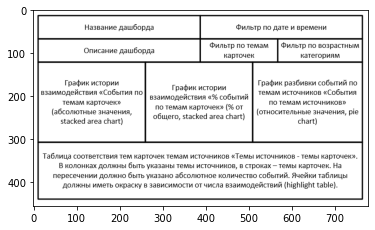

In [1]:
import matplotlib.pyplot as plt # для отрисовки картинки
import matplotlib.image as mpimg
image = mpimg.imread("Image (2).png")
plt.imshow(image)
plt.show()

## Подключение к базе данных, загрузка файлов и осмотр

### Подключение к БД

In [2]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

# импортируем библиотеки
import pandas as pd
from sqlalchemy import create_engine
!pip install psycopg2

db_config = {'user': 'praktikum_student', # имя пользователя
            'pwd': 'Sdf4$2;d-d30pp', # пароль
            'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
            'port': 6432, # порт подключения
            'db': 'data-analyst-zen-project-db'} # название базы данных

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                db_config['pwd'],
                                                db_config['host'],
                                                db_config['port'],
                                                db_config['db'])

engine = create_engine(connection_string)

In [3]:
# Формируем sql-запрос.
query = ''' SELECT *
            FROM dash_visits
        '''
 
dash_visits = pd.io.sql.read_sql(query, con = engine)

### Загрузка файлов и осмотр

Посмотрим наши данные, которые выгрузили с БД:

In [4]:
dash_visits.to_csv('dash_visits.csv')


In [5]:
dash_visits.head(5)

,record_id,item_topic,source_topic,age_segment,dt,visits
0,1040597,Деньги,Авто,18-25,2019-09-24 18:32:00,3
1,1040598,Деньги,Авто,18-25,2019-09-24 18:35:00,1
2,1040599,Деньги,Авто,18-25,2019-09-24 18:54:00,4
3,1040600,Деньги,Авто,18-25,2019-09-24 18:55:00,17
4,1040601,Деньги,Авто,18-25,2019-09-24 18:56:00,27


Посмотрим какие темы карточек располагает Яндекс.Дзен:

In [6]:
dash_visits['item_topic'].unique()

array(['Деньги', 'Дети', 'Женская психология', 'Женщины', 'Здоровье',
       'Знаменитости', 'Интересные факты', 'Искусство', 'История',
       'Красота', 'Культура', 'Наука', 'Общество', 'Отношения',
       'Подборки', 'Полезные советы', 'Психология', 'Путешествия',
       'Рассказы', 'Россия', 'Семья', 'Скандалы', 'Туризм', 'Шоу', 'Юмор'],
      dtype=object)

Посмотрим какие есть темы и источники:

In [7]:
dash_visits['source_topic'].unique()

array(['Авто', 'Деньги', 'Дети', 'Еда', 'Здоровье', 'Знаменитости',
       'Интерьеры', 'Искусство', 'История', 'Кино', 'Музыка', 'Одежда',
       'Полезные советы', 'Политика', 'Психология', 'Путешествия',
       'Ремонт', 'Россия', 'Сад и дача', 'Сделай сам',
       'Семейные отношения', 'Семья', 'Спорт', 'Строительство',
       'Технологии', 'Финансы'], dtype=object)

Какой возрастной сегмент:

In [8]:
dash_visits['age_segment'].unique()

array(['18-25', '26-30', '31-35', '36-40', '41-45', '45+'], dtype=object)

Посмотрим описательную статистику для столбца `Дата и время`:

In [9]:
dash_visits['dt'].describe()

C:\Users\CA52~1\AppData\Local\Temp/ipykernel_11868/2972088052.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  dash_visits['dt'].describe()


count                   30745
unique                     17
top       2019-09-24 18:58:00
freq                     3383
first     2019-09-24 18:28:00
last      2019-09-24 19:00:00
Name: dt, dtype: object

Наши данные охватывают 32 минуты: с 18-28 до 19-00 часов, 24 сентября 2019 года. Количество записей получилось 30745.

Посмотрим уникальные дату и время:

In [10]:
dash_visits['dt'].unique()

array(['2019-09-24T18:32:00.000000000', '2019-09-24T18:35:00.000000000',
       '2019-09-24T18:54:00.000000000', '2019-09-24T18:55:00.000000000',
       '2019-09-24T18:56:00.000000000', '2019-09-24T18:57:00.000000000',
       '2019-09-24T18:58:00.000000000', '2019-09-24T18:59:00.000000000',
       '2019-09-24T19:00:00.000000000', '2019-09-24T18:29:00.000000000',
       '2019-09-24T18:30:00.000000000', '2019-09-24T18:31:00.000000000',
       '2019-09-24T18:52:00.000000000', '2019-09-24T18:33:00.000000000',
       '2019-09-24T18:53:00.000000000', '2019-09-24T18:28:00.000000000',
       '2019-09-24T18:34:00.000000000'], dtype='datetime64[ns]')

Посмотрим общую информацию о датафрейме:

In [11]:
dash_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30745 entries, 0 to 30744
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   record_id     30745 non-null  int64         
 1   item_topic    30745 non-null  object        
 2   source_topic  30745 non-null  object        
 3   age_segment   30745 non-null  object        
 4   dt            30745 non-null  datetime64[ns]
 5   visits        30745 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 1.4+ MB


В нашем датафрейме 6 колонок и 30745 строк.Пропущенные значения отсутствуют.

Посчитаем общую сумму всех событий:

In [12]:
dash_visits['visits'].sum()

310207

## Построение дашборда в Tableau

Загрузим данные датафрейма dash_visits  и выполним анализ пользовательского взаимодействия с карточками статей в Яндекс.Дзене

Дашборд: <https://public.tableau.com/authoring/Level_16584398975290/Dashboard1#1>

Презентация: <https://disk.yandex.ru/i/a1EwM8ApJfAD2Q>